<a href="https://colab.research.google.com/github/aaalqarni/Data-/blob/master/Load_model_Reddit_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! ls

drive  sample_data


In [6]:
%cd /content/drive/My Drive/group-5/Sarcasm/Dataset/Sarc_reddit_Khodak/



/content/drive/.shortcut-targets-by-id/18jkhFxxAIhP43KeQN-eCjSicYYbVyecy/group-5/Sarcasm/Dataset/Sarc_reddit_Khodak


In [7]:
! cd ..

In [8]:
! ls 

 1309_36545_compressed_train-balanced-sarcasm.csv.zip
 authors.json
 authors.json.bz2
 Final_result.csv
 main
 model_reddit_cased_save
 model_reddit_cased_save_02
 model_REDDIT_large_cased_save
 model_REDDIT_save
 Multinomial_logit_Sarcasm.pkl
 Multinomial_Naive_Bayes.pkl
 Random_forest.pkl
'readme (1).gdoc'
 readme.gdoc
 readme.txt
 Reddit_bert_model
 sarcasm_reddit_bert_model
 sarcasm_reddit_bert_model_02
 stats.json
 stats.json.bz2
 SVM.pkl
 test-balanced.csv
 test-balanced-sarcasm.csv
 train-balanced-sarcasm.csv


In [9]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


In [10]:
import json
import pandas as pd 
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
Data = pd.read_csv("train-balanced-sarcasm.csv")
Data['comment']= Data['comment'].astype(str)

In [12]:

Data.head()



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [13]:
!pip install 'transformers==2.10'

     |████████████████████████████████| 665kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 24.6MB/s 
     |████████████████████████████████| 890kB 46.5MB/s 
     |████████████████████████████████| 3.8MB 55.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=2bda6588dff91455ef6fc0126b403769599ffd79937de3c06ebb1628dfb73cad
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
#%cd /content/drive/My Drive/group-5/Sarcasm/Dataset/sarcasm_v2_Oraby

In [14]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
# load config
# conf = BertConfig.from_pretrained('./sarcasm_discussion_bert_model/model_save', num_labels=2)
# load a sequence model
dir="/content/drive/My Drive/group-5/Sarcasm/Dataset/sarcasm_v2_Oraby/sarcasm_discussion_bert_model_2/model_save"
conf = BertConfig.from_pretrained(dir, num_labels=2)
bsm = BertForSequenceClassification.from_pretrained(dir, config=conf)
# get bert core model


bsm.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [39]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(Data, test_size=0.2)

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202166 entries, 723977 to 86170
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           202166 non-null  int64 
 1   comment         202166 non-null  object
 2   author          202166 non-null  object
 3   subreddit       202166 non-null  object
 4   score           202166 non-null  int64 
 5   ups             202166 non-null  int64 
 6   downs           202166 non-null  int64 
 7   date            202166 non-null  object
 8   created_utc     202166 non-null  object
 9   parent_comment  202166 non-null  object
dtypes: int64(4), object(6)
memory usage: 17.0+ MB


In [41]:
test_data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
723977,0,Maybe take your own advice slick.,SwoleNole,baseball,-1,-1,0,2015-04,2015-04-13 13:17:42,"Be that as it may, they were a playoff team la..."
27054,0,Jaroslaw Kaczynski is retarded!,sixgears,worldnews,6,-1,-1,2016-11,2016-11-14 19:16:32,"Poland exhumes president, others killed in 201..."
929143,0,It is though....,boilerrat,gaming,2,2,0,2012-05,2012-05-31 23:08:54,THATS SO NOSTALGIC!!
835037,0,I was just answering your question.,orangeslash,CFB,1,1,0,2013-11,2013-11-18 15:54:07,Still can't lead with the crown of your helmet...
370740,1,"Yay, another two weeks of Combine 24/7..",ABrokenOven,blackops3,0,0,0,2016-02,2016-02-06 01:33:55,They said we'd get it in a week or two. Calm y...
...,...,...,...,...,...,...,...,...,...,...
329487,1,Yeah cause sci-fi movies with female leads are...,BurgerLaowai,TumblrInAction,1,1,0,2016-08,2016-08-30 18:02:15,Single greatest meme in the history of man
611332,0,Yeah cause who needs science and research right?,onepennytoomany,worldnews,-1,-1,0,2015-08,2015-08-23 15:46:25,Thousands of prehistoric mammoth tusks are bei...
810472,1,Much better if you continue to think they are ...,OmniStardust,PoliticalDiscussion,-2,-2,0,2013-11,2013-11-26 18:50:00,If I thought rich people were hoarding MY mone...
21260,0,beautiful,RecklessBasterd,Dodgers,6,-1,-1,2016-10,2016-10-14 02:42:42,Joc Pederson GONE


In [ ]:
#dqube_test = pd.read_csv("/content/drive/My Drive/group-5/DQUBE_Processed.csv",index_col=None)
#dqube_test = dqube_test.iloc[:,[11,13]]
#dqube_test.rename(columns={ dqube_test.columns[0]: "sentence", dqube_test.columns[1]: "label" }, inplace = True)
#dqube_test.head()

In [ ]:
#%cd sarcasm_v2_Oraby

In [ ]:
#test_data =pd.read_csv("GEN-sarc-notsarc.csv")

In [ ]:
#test_data["class"].value_counts()

In [ ]:
#test_data["class"]=test_data["class"].astype(str)

#sarcasm = {'sarc': 1,'notsarc': 0} 


#test_data["class"] = [sarcasm[item] for item in test_data["class"]] 

In [ ]:
# valid_label=test_data["class"]
# Text=test_data["text"]

In [42]:
MAX_SEQ_LENGTH =500
TRAIN_BATCH_SIZE =16
NUM_TRAIN_EPOCHS = 3

EVAL_BATCH_SIZE = 8
LEARNING_RATE = 5e-5


In [43]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler




tokenizer = BertTokenizer.from_pretrained(dir)


# Report the number of sentences.
# print('Number of test examples: {}'.format(len(dqube_test)))

# Create sentence and label lists
test = test_data.comment.values
labels = test_data.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    #print(sent)
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_SEQ_LENGTH,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 8 


# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [44]:
# Prediction on test set
import torch.nn.functional as F 
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
bsm.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = bsm(b_input_ids, attention_mask=b_input_mask)
              
        
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  # Store predictions and true labels
  # Concatenate logits from each batch
  all_logits = torch.cat(outputs, dim=0)

  # Apply softmax to calculate probabilities
  probs = F.softmax(all_logits, dim=1).cpu().numpy()
  predictions.append(logits)
  true_labels.append(label_ids)
print('    DONE.')

Predicting labels for 202,166 test sentences...
    DONE.


In [45]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score,accuracy_score,average_precision_score,precision_score, recall_score
import numpy as np
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print("F1 score: {}".format(precision_recall_fscore_support(flat_predictions, flat_true_labels, average='macro')))

F1 score: (0.5463555069513808, 0.5557784489627531, 0.5258289441171211, None)


In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))

Accuracy: 0.5454131753113778


In [47]:
print("F1 score: {}".format(f1_score(flat_predictions, flat_true_labels, average='macro')))
average_precision = average_precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)))
precision=precision_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
recall=recall_score(flat_predictions.reshape((-1)), flat_true_labels.reshape((-1)),average="macro")
print('precision-score: {0:0.2f}'.format(precision))
print('Recall-score: {0:0.2f}'.format(recall))
print("Accuracy: {}".format(accuracy_score(flat_predictions, flat_true_labels)))

F1 score: 0.5258289441171211
precision-score: 0.55
Recall-score: 0.56
Accuracy: 0.5454131753113778


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(flat_true_labels,flat_predictions)

array([[34589, 66957],
       [24945, 75675]])

In [49]:
import numpy as np

# Combine the results across the batches.
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

In [50]:
from scipy.special import softmax
# Our performance metric for the test set.
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

prediction_logit = np.argmax(softmax(predictions, axis=1),axis=1)
result = softmax(predictions, axis=1)
positive_prob = result[:,1]
pred_label = [1 if i > 0.5 else 0 for i in positive_prob]

In [51]:
# Calculate the evaluation metrics accuracy, precision, recall and f1 score.
accuracy = accuracy_score(true_labels, pred_label)
print('Accuracy: ', accuracy)

precision = precision_score(true_labels, pred_label)
print("Precision: ", precision)

recall = recall_score(true_labels, pred_label)
print("Recall: ", recall)

f1 = f1_score(true_labels, pred_label)
print("F1 score: ", f1)

Accuracy:  0.5454131753113778
Precision:  0.5305611643950866
Recall:  0.7520870602265951
F1 score:  0.6221942676730304


In [52]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels,pred_label)


array([[34589, 66957],
       [24945, 75675]])

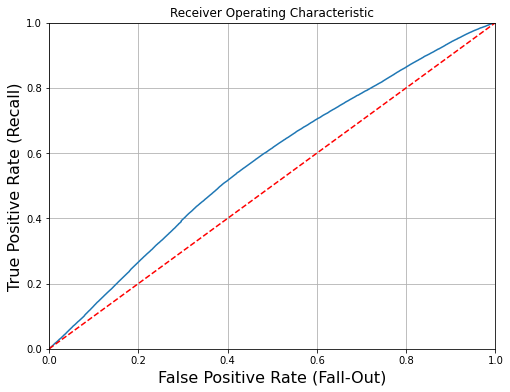

AUC: 0.5463555069513808


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(true_labels, positive_prob)

def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=1.5, label=label)
  plt.plot([0,1],[0,1],'r--')
  plt.axis([0, 1, 0, 1])                                    
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
  plt.grid(True)  
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.title('Receiver Operating Characteristic')                                        

plt.figure(figsize=(8, 6))  
                  
plot_roc_curve(fpr, tpr)
           
                       
plt.show()
print("AUC:" , roc_auc_score(true_labels,pred_label))